In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV, validation_curve

Using TensorFlow backend.


In [2]:
ds = pd.read_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_flagged.csv")
pd.set_option('max_columns', 150)

In [3]:
ds.drop(columns="Unnamed: 0",inplace=True)

In [4]:
ds.head(5)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,2,2,4,3,4,4,5,4,3,4,4,2,4,3,2,2,3,4,4,4,3,34,3,95,PL,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,5,5,4,2,5,5,4,4,2,2,2,2,4,4,2,4,3,3,4,4,2,22,2,80,AU,0.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,2,2,4,5,2,2,5,2,4,2,4,0,5,5,4,1,4,2,3,4,24,1,99,US,0.54,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,3,4,5,5,5,4,5,4,3,4,3,4,4,4,2,5,2,4,4,1,5,21,2,90,US,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
ds["US_Other"]=np.where(ds.country=="US",0,1)

In [6]:
ds.drop("country",axis=1,inplace=True)

let's standard scale age and accuracy columns before proceeding to our first model

In [7]:
features = ds[['age','accuracy']]

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

In [8]:
ds[['age','accuracy']]=features_std

In [9]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,US_Other
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,1.03349,2,0.900357,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Now that our dataset is properly cleaned and scaled, we can start building models.
However, let's adjust the slight imbalance first, by using Smote.

In [27]:
ds.US_Other.value_counts()

0    27370
1    25259
Name: US_Other, dtype: int64

In [10]:
#Definign X 

X = ds.drop(columns="US_Other",axis=1)
y = ds.US_Other

In [11]:
#Defining train and test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=67)

In [13]:
#Now balancing with Smote
sm = SMOTE(random_state=67)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print (y_train.value_counts() , np.bincount(y_train_res))

0    21922
1    20181
Name: US_Other, dtype: int64 [21922 21922]


Let's start with A RandomForestClassifier model, since all the flagged columns may be adapted for that

In [36]:
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train_res , y_train_res)


C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.5507315219456583 precision: 0.5452658884565499 recall: 0.41394249704608116 F1: 0.47061457517071537


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.68      0.61      5448
           1       0.55      0.41      0.47      5078

    accuracy                           0.55     10526
   macro avg       0.55      0.55      0.54     10526
weighted avg       0.55      0.55      0.54     10526



In [42]:
cm

array([[3695, 1753],
       [2976, 2102]], dtype=int64)

Validation Curve

In [51]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = x_train_res, y = y_train_res, 
                                param_name = 'n_estimators', 
                                param_range = n_estimators, cv = 3)

KeyboardInterrupt: 

Let's do a grid search to see if we can improve our results

In [45]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth)

gridF = GridSearchCV(RandomForestClassifier(), hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

bestF = gridF.fit(x_train_res, y_train_res)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 10.4min finished


In [47]:
print(bestF)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [17]:
bestF.best_params_

NameError: name 'bestF' is not defined

Lets try with K neighbours classifier, first lets determine the best k

In [14]:
k_range=range(1,30)
scores=[]

In [15]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_res,y_train_res)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

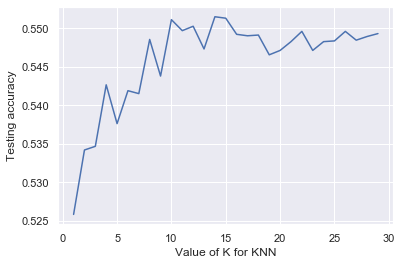

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing accuracy")

Naive BAYES

LOGISTIC REGRESSION

In [ ]:
#Maybe not good because we have some missing values

SVM

Sart a new notebook that separates US US AUS NL from the rest and rerun the same test, if still no results, go to unsupervised